In [43]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
A = array([[4, 11], [8, 4], [13, 5],[7,14]])
A

array([[ 4, 11],
       [ 8,  4],
       [13,  5],
       [ 7, 14]])

In [4]:
M = mean(A.T, axis=1)
M

array([8. , 8.5])

In [6]:
c=A-M
c

array([[-4. ,  2.5],
       [ 0. , -4.5],
       [ 5. , -3.5],
       [-1. ,  5.5]])

In [8]:
V = cov(c.T)
print(V)

[[ 14. -11.]
 [-11.  23.]]


In [9]:
values, vectors = eig(V)
print(vectors)
print()
print(values)

[[-0.83025082  0.55738997]
 [-0.55738997 -0.83025082]]

[ 6.61513568 30.38486432]


In [11]:
P = vectors.T.dot(c.T)
print(P.T)

[[ 1.92752836 -4.30518692]
 [ 2.50825486  3.73612869]
 [-2.20038921  5.69282771]
 [-2.23539401 -5.12376947]]


In [113]:
P.T[:,0]

array([ 1.92752836,  2.50825486, -2.20038921, -2.23539401])

# EDA

In [13]:
toyota=pd.read_csv("Toyota.csv")
train=pd.read_csv("train.csv")
pima=pd.read_csv("pima-indians-diabetes-data.csv")

In [14]:
toyota.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [17]:
toyo=toyota.copy()

In [18]:
toyo.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [20]:
toyo.drop(columns="Unnamed: 0",inplace=True)

In [21]:
toyo

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015


In [22]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1436 non-null   object 
 3   FuelType   1336 non-null   object 
 4   HP         1436 non-null   object 
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 112.3+ KB


In [23]:
toyo.isna().sum()

Price          0
Age          100
KM             0
FuelType     100
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

## Dealing with Null values


In [27]:
toyo.shape

(1436, 10)

In [25]:
toyo.Age.unique()

array([23., 24., 26., 30., 32., 27., 25., 22., 31., 28., 29., nan, 20.,
       19., 17., 11., 18., 13., 14.,  4.,  8.,  7., 16., 15., 10., 12.,
        9.,  6.,  2.,  1., 43., 38., 40., 44., 41., 37., 39., 42., 35.,
       34., 33., 36., 53., 51., 54., 45., 55., 48., 52., 49., 56., 50.,
       47., 46., 58., 68., 59., 62., 65., 67., 64., 60., 61., 66., 57.,
       63., 73., 79., 78., 74., 77., 69., 80., 76., 70., 71., 75., 72.])

In [28]:
toyo.FuelType.unique()

array(['Diesel', nan, 'Petrol', 'CNG'], dtype=object)

In [29]:
toyo.FuelType.mode()

0    Petrol
dtype: object

In [31]:
toyo.FuelType.fillna(toyo.FuelType.mode().iloc[0],inplace=True)

In [32]:
toyo.FuelType.isna().sum()

0

In [33]:
toyo.MetColor.unique()

array([ 1., nan,  0.])

In [34]:
toyo.MetColor.mode()

0    1.0
dtype: float64

In [35]:
toyo.MetColor.fillna(toyo.MetColor.mode().iloc[0],inplace=True)

In [36]:
toyo.MetColor.isna().sum()

0

In [37]:
toyo.Age.mode()

0    65.0
dtype: float64

In [38]:
toyo.Age.fillna(toyo.Age.mode().iloc[0],inplace=True)

In [39]:
toyo.isna().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [40]:
toyo.describe(include="all")

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436,1436,1436,1436.000000,1436.000000,1436.000000,1436,1436.00000
unique,NaN,NaN,1256,3,13,NaN,NaN,NaN,7,NaN
top,NaN,NaN,??,Petrol,110,NaN,NaN,NaN,5,NaN
freq,NaN,NaN,15,1277,833,NaN,NaN,NaN,673,NaN
mean,10730.824513,56.321727,NaN,NaN,NaN,0.708914,0.055710,1566.827994,NaN,1072.45961
std,3626.964585,18.087002,NaN,NaN,NaN,0.454421,0.229441,187.182436,NaN,52.64112
min,4350.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,1300.000000,NaN,1000.00000
25%,8450.000000,44.000000,NaN,NaN,NaN,0.000000,0.000000,1400.000000,NaN,1040.00000
50%,9900.000000,62.000000,NaN,NaN,NaN,1.000000,0.000000,1600.000000,NaN,1070.00000
75%,11950.000000,68.000000,NaN,NaN,NaN,1.000000,0.000000,1600.000000,NaN,1085.00000


In [41]:
toyo.corr()

,Price,Age,MetColor,Automatic,CC,Weight
Price,1.000000,-0.840395,0.100920,0.033081,0.165067,0.581198
Age,-0.840395,1.000000,-0.088645,0.034468,-0.118681,-0.441497
MetColor,0.100920,-0.088645,1.000000,-0.011450,0.032108,0.046614
Automatic,0.033081,0.034468,-0.011450,1.000000,-0.069321,0.057249
CC,0.165067,-0.118681,0.032108,-0.069321,1.000000,0.651450
Weight,0.581198,-0.441497,0.046614,0.057249,0.651450,1.000000


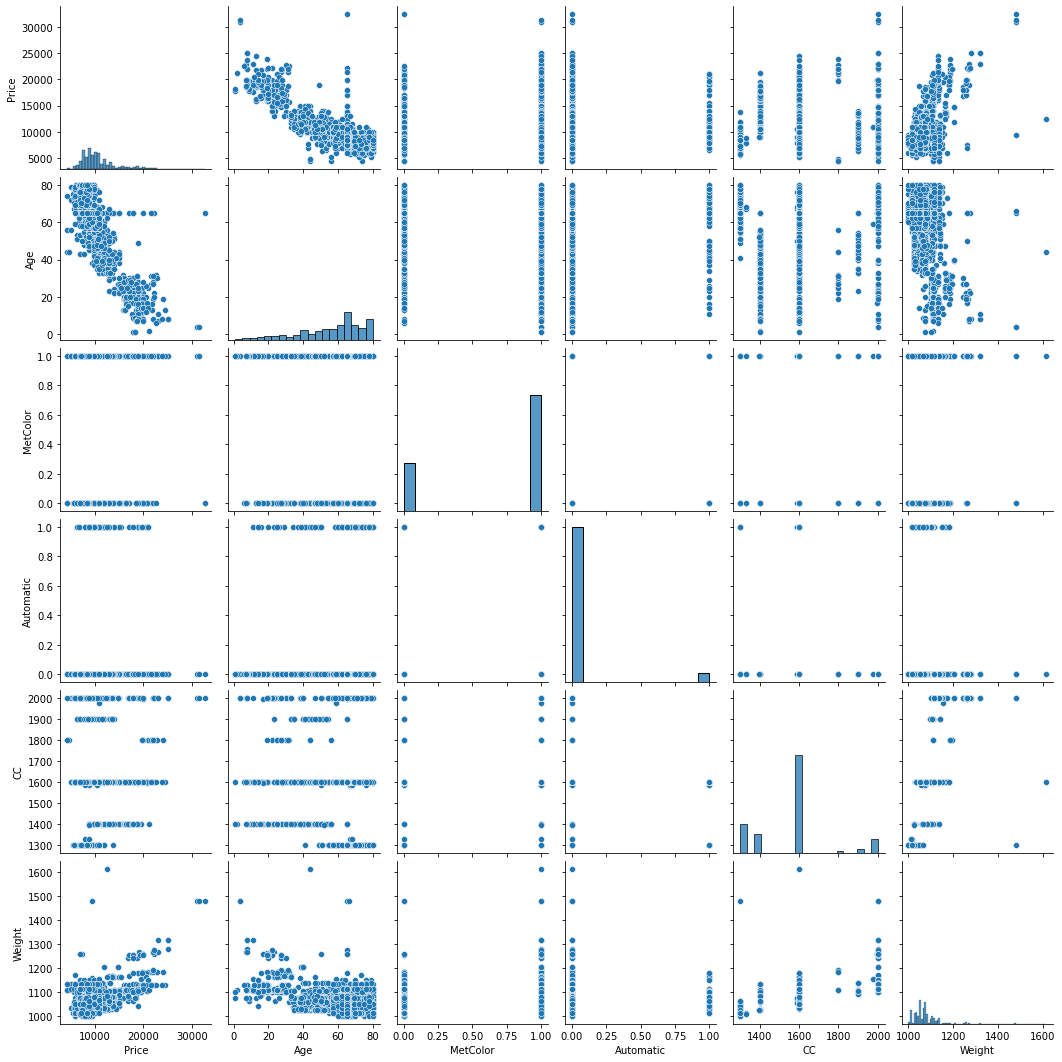

In [44]:
sns.pairplot(toyo)

C:\Users\Aniket kumar\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Aniket kumar\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


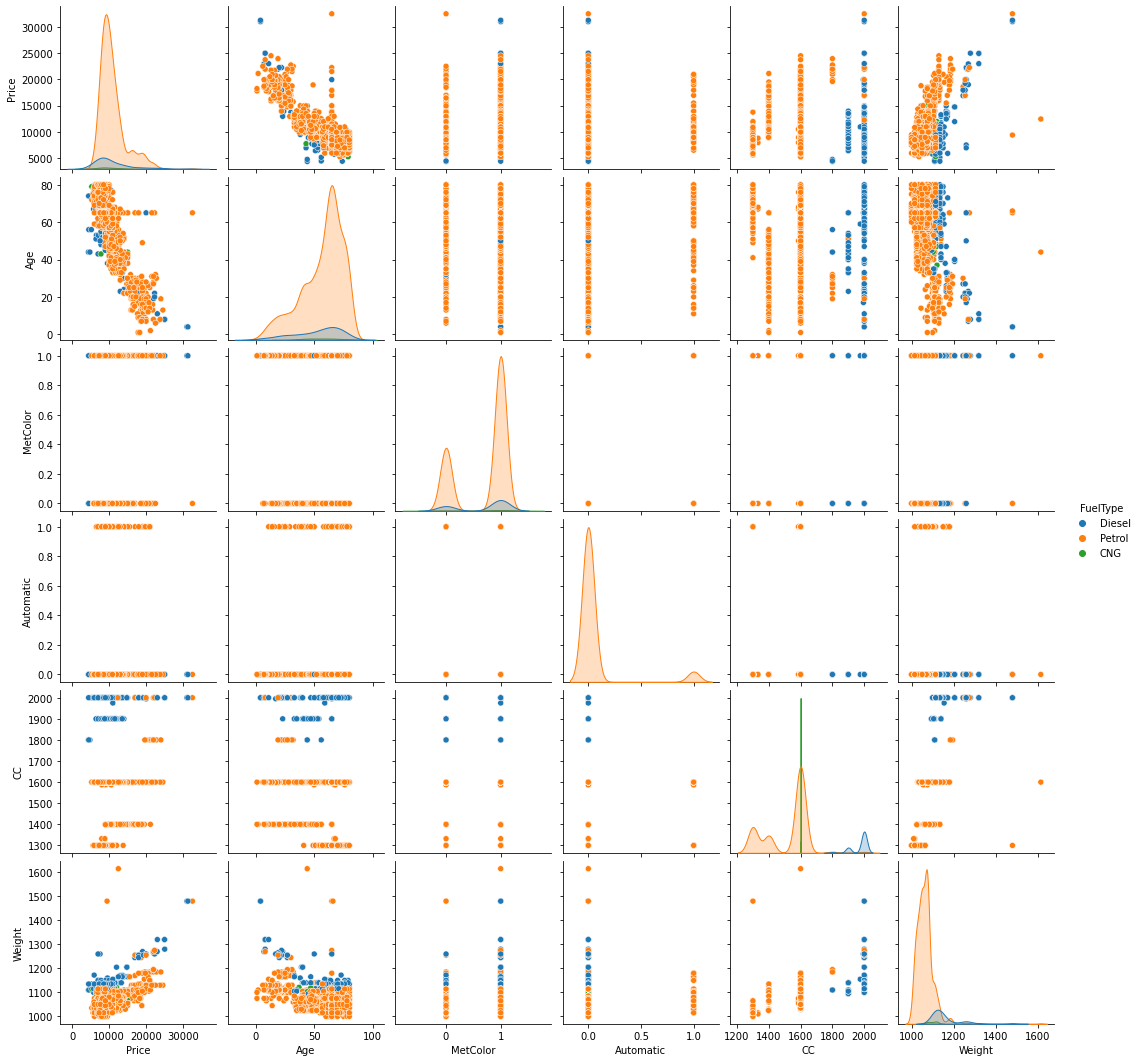

In [46]:
sns.pairplot(toyo,hue="FuelType")

<AxesSubplot:>

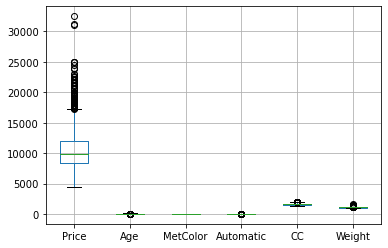

In [57]:
toyo.boxplot()

<AxesSubplot:>

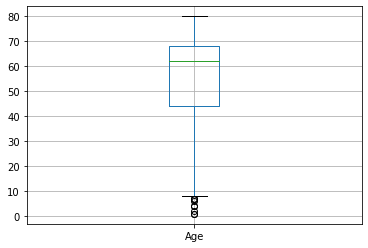

In [59]:
toyo.boxplot(column="Age")

In [69]:
toyo[(toyo.Age<10)].count()

Price        24
Age          24
KM           24
FuelType     24
HP           24
MetColor     24
Automatic    24
CC           24
Doors        24
Weight       24
dtype: int64

In [78]:
toyo.sort_values("Age").head(24)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
185,18245,1.0,1,Petrol,110,1.0,0,1600,5,1075
184,17795,1.0,1,Petrol,98,1.0,0,1400,4,1100
182,21125,2.0,225,Petrol,97,1.0,0,1400,5,1110
110,31000,4.0,4000,Diesel,116,1.0,0,2000,5,1480
111,31275,4.0,1500,Diesel,116,1.0,0,2000,5,1480
179,22500,6.0,3000,Petrol,110,0.0,0,1600,5,1130
181,18700,7.0,450,Petrol,97,1.0,0,1400,5,1110
180,18500,7.0,2000,Petrol,110,0.0,0,1600,5,1075
177,19950,7.0,6250,Petrol,110,1.0,0,1600,5,1115
114,22950,7.0,10000,Diesel,116,1.0,0,2000,5,1270


In [80]:
toyo[toyo.KM=="??"]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
6,16900,27.0,??,Diesel,????,1.0,0,2000,3,1245
64,17950,27.0,??,Petrol,97,1.0,0,1400,5,1110
91,22250,20.0,??,Diesel,90,1.0,0,2000,3,1260
112,24950,8.0,??,Diesel,116,1.0,0,2000,5,1320
125,21750,16.0,??,Petrol,110,1.0,0,1600,5,1130
131,15950,20.0,??,Petrol,97,1.0,0,1400,5,1110
398,10500,55.0,??,Petrol,110,1.0,0,1600,4,1035
491,10750,54.0,??,Petrol,110,1.0,0,1600,5,1075
1049,6750,77.0,??,Diesel,72,1.0,0,2000,4,1100
1120,7350,72.0,??,Petrol,86,1.0,0,1300,3,1015


In [82]:
toyo.KM.count()

1436

In [91]:
toyo.KM.mean()

TypeError: Could not convert 469867293741711480003850061000??7588919700711383146143610321892300034131187393400021716255636435967660439055634932220258132845034545414154414211090975035199295103269241000430002500010000253292750049059440684696111040410025084000793757504872215649826263657086560004986649163457254321043000397043895037400371773654433511??32181309933040030000297192920629198288172822728000280002526623489225752200020019200001700316238154148537700066966518845000548110??344723332931850303512943525948245002390223175192001800016123146351374811500100007187140001500??1325310000600010841163000573135703751099400103911536012??3600035000337403347732627??294412937129000278212737125170250002300022588216842142820629202702010520000199881832817896173001703813747136341317813157130001250011999117541100010000765065006155600054595278500011110001007710000978885747000625050003000200045022515112430001806381798601788581610001583201312731300621234251182171100001088471056999882396829965189220491456899688975785389850178431282743811068042578677784257810877321756997569774846743197428574172730427179371200678056598865345645646345963451620006130061200610006082960500595005900058954587985836358277577115726956001559685567855539554005535054600537735371953644533505300052084520005194551732508735085650640500004950049332492914895248945489284819748052480114800047350468214669446515463274630445886457134560045287450814483044757442184363243427432544300042823425604175441499413394100040000397573965939650395243951639439390003893238812386653865338461380783778237576375333738937320370003700036566362693607436066345993400033623335913325833113330003294132781325323243132000310003098930742301902971629716296402905628715285712836228150273012724027170271412626226000252282506224723246502455324475244442401124000236162286522780219042165121500210271850018000170511651216325160001200010000216000198167176000174139174000150000149329146736143513142130140700138394137000135258131364129155126110119742117913117430??115558115113115046113997107859104805103454103018102352102030101352998659932398100980409760097234961359610094401941229134090200900978904989000872748622184598835678310682805827358190580320800907980078785786007778077648772707616775249752317504574849747157465674500744947363473403731757300072242720007172571276704407023969813696596957469000685656852068414667776652766063654716540065170650006419364000637926363563135631236300063000629876275162519622806167261000610006055860348??5900058761587455859658530583775814257948576455750057475567435667555877555005490054465537005356153408532685311652448521495214152000509675040050000500004996949568494734943249417493664873148370480714785247768476894745147219472114685646500464494639146230460294600045900458504533644537437004312041710417004163641273408364040040361403254000039706392913900038900384033746137000364063600536000360003600035823352303514234890348823400033998332303302131999315793100030806304612968629650295002865627500269382662426221226482250019313176191706915000102105309131000205000204250194545190900183500176184174833155720155500154783154462150585149000147636144521144000140168140000139800137050136956135337133769133405132807132393130270130000127000126800126452125175125000123000121626120400120000119541119500119289118833118000117955117609117000116000115715115191115071115000114846114383113700113118112827112116112000112000111769110853110287109547109230109150108793106784105942105000105000104299104000104000103458103400102807102494102300102106101889101791101469101001100748100550997819865898500982919764897425971739704696000960009575095147950009500094606945049342893408932969309892922924989222691505913339124691000907279000089576891458900088807886858866788480881278800087821876548688886871867148588985000850008497684558845498448283908835608300082723824218225482115820008196581250811928117081083807148047080439804308042680265801538012180086800008000080000798587976279660791507900078955787507852178356780767806377821776957750077457770297700876791767007656976162761557560975569754297500075000750007496374889748757474774720744577433774308741937417973936738947350073376733007317272928728807252272000720007136671317710007095470908705607055270500704537021870116700687000070000691036902269000688656872368453682386815368000680006776267146671106701067003667856655066259660826600066000658966578565513654636540065259650006500065000649666495064914647976477264690646306461364383640006388163870633286300063000623966237762316622926222562222621356202461977619306168261568615046138461343612546116661149611446112761100611006100060724607086053260000600006000059295592645900059000590005900059000588605882958654583005826958136581135805858000580005756557413573745717957169571245700057000570005625956209560745594255844557475547855085550615500055000549365487554847545545412554000540005400054000532855305353000530005296852800525485248752383521125171251421512355100050925508065046950173500004994249585492584900048738477504761247500472374717147060470144692946000456814554945000450004500045000450004500044944445974445843818434264300043000430004300042750421024158641200402144000039222391443900038019377593750037111370003695436943369233665836000360003551235283350003500034114340003384733535330003215031588314803130731000306343030028500285002800026698260002550525000228352270522178173451553515110232940218118217764207114203254??197501194765191620183277180378178800176177176000172980170000164000161775160000159968159908158492156204156169155210155000154900151300151000150000146304146197145996143560139145138500137741137178134889134660134539131500131307130025130000128960128351128006127159126478126000125778125400124910124743124591124057123403123104123077122820122290121900121545120474120263120196120000120000115877115345115157115000114258112963112307??1116021113921109011108871106341100001095401092631075161071081070001062501061501061081058561051521051351043441041501040001031211023001020051020001018551017731011591010001007321007191004871004581001921001239997199397993749924598742981549800097548975349749497085970009630296000960009590995700956519500094447940799384193090930669303993000928309225592096919219190091399910829037090345903059001190000899838995389800897398952089507890968870088500881868800087743876138735887083870008700087000870008686086109860008600085864855658547085200850008498884966844728440284123840008400084000838508354083405832918313383047827008267582595822568210382021820008198881930816638048680000790007889478689784357826078120770007700076382762687615176000760007584075799755257532375322752267508575000750007500074926747857457374567741967415174096740937400074000736387346073200731167301472703723287222272128720907200072000719007182571740715007135971263711867105471000709397093270597704827012470039699046938869320690006898868945682856800068000674516726667255671006709266880668556684366718661686595065500653076525465021650066428064000640006400063918636346350063266625956258162285619066170061648616266151061165610006083360600604836047660142600506000060000598155932659240591645901758952584545834158267580005782957787576285753757263571445709657000565665630756214561325542554439538095313352900527005232052287520005200052000518744982749640495804917048838485764840048242479554763347400473604550745410448504482644444437204362243532428004231742186420004009339800391683894536537??360003582134717??3096429000??240002300020544??17016??1 to numeric

In [ ]:
#Converting KM to int

In [92]:
pd.to_numeric(toyo.KM)

ValueError: Unable to parse string "??" at position 6

In [102]:
fmean=toyo.KM[toyo.KM!="??"]

In [104]:
fmean.median()

63634.0

In [109]:
toyo.KM[toyo.KM=="??"].fillna(fmean.median(),inplace=True)

In [110]:
toyo[toyo.KM=="??"]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
6,16900,27.0,??,Diesel,????,1.0,0,2000,3,1245
64,17950,27.0,??,Petrol,97,1.0,0,1400,5,1110
91,22250,20.0,??,Diesel,90,1.0,0,2000,3,1260
112,24950,8.0,??,Diesel,116,1.0,0,2000,5,1320
125,21750,16.0,??,Petrol,110,1.0,0,1600,5,1130
131,15950,20.0,??,Petrol,97,1.0,0,1400,5,1110
398,10500,55.0,??,Petrol,110,1.0,0,1600,4,1035
491,10750,54.0,??,Petrol,110,1.0,0,1600,5,1075
1049,6750,77.0,??,Diesel,72,1.0,0,2000,4,1100
1120,7350,72.0,??,Petrol,86,1.0,0,1300,3,1015


In [47]:
pima.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
